In [ ]:
# Install necessary dependencies
!pip install transformers torch pandas numpy scikit-learn matplotlib emoji

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.5 MB/s et

In [ ]:
from google.colab import files
uploaded = files.upload()  # If you haven't already uploaded kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Verify that the file exists
!ls -la ~/.kaggle/


Saving kaggle.json to kaggle (1).json
total 16
drwxr-xr-x 2 root root 4096 Apr  4 01:02 .
drwx------ 1 root root 4096 Apr  4 01:06 ..
-rw------- 1 root root   74 Apr  4 01:58 kaggle.json


In [ ]:
!ls -la



total 111568
drwxr-xr-x 1 root root     4096 Apr  4 01:58  .
drwxr-xr-x 1 root root     4096 Apr  4 00:52  ..
drwxr-xr-x 4 root root     4096 Apr  2 13:35  .config
-rw-r--r-- 1 root root       74 Apr  4 01:58 'kaggle (1).json'
-rw-r--r-- 1 root root       74 Apr  4 01:02  kaggle.json
drwxr-xr-x 2 root root     4096 Apr  4 01:04  logs
drwxr-xr-x 4 root root     4096 Apr  4 01:45  results
drwxr-xr-x 1 root root     4096 Apr  2 13:35  sample_data
drwxr-xr-x 2 root root     4096 Apr  4 01:03  sentiment140
drwxr-xr-x 2 root root     4096 Apr  4 01:03  sentiment140_data
-rw-r--r-- 1 root root 84855679 Sep 21  2019  sentiment140.zip
-rw-r--r-- 1 root root 29331739 Feb  7  2024  us-comments-cleaned-dataset-for-sentiment-analysis.zip
drwxr-xr-x 3 root root     4096 Apr  4 01:06  wandb
drwxr-xr-x 2 root root     4096 Apr  4 01:03  youtube_comments


In [ ]:
# Download the Sentiment140 dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140

# List files to verify the zip file is downloaded
!ls -la


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
total 111568
drwxr-xr-x 1 root root     4096 Apr  4 01:58  .
drwxr-xr-x 1 root root     4096 Apr  4 00:52  ..
drwxr-xr-x 4 root root     4096 Apr  2 13:35  .config
-rw-r--r-- 1 root root       74 Apr  4 01:58 'kaggle (1).json'
-rw-r--r-- 1 root root       74 Apr  4 01:02  kaggle.json
drwxr-xr-x 2 root root     4096 Apr  4 01:04  logs
drwxr-xr-x 4 root root     4096 Apr  4 01:45  results
drwxr-xr-x 1 root root     4096 Apr  2 13:35  sample_data
drwxr-xr-x 2 root root     4096 Apr  4 01:03  sentiment140
drwxr-xr-x 2 root root     4096 Apr  4 01:03  sentiment140_data
-rw-r--r-- 1 root root 84855679 Sep 21  2019  sentiment140.zip
-rw-r--r-- 1 root root 29331739 Feb  7  2024  us-comments-cleaned-dataset-for-sentiment-analysis.zip
drwxr-xr-x 3 root root     4096 Apr  4 01:06  wandb
drwxr-xr-x 2 root root     4

In [ ]:
# Unzip the Sentiment140 dataset into a folder named sentiment140_data
!unzip -o sentiment140.zip -d sentiment140_data

# List the contents of the sentiment140_data folder to verify
!ls -la sentiment140_data


Archive:  sentiment140.zip
  inflating: sentiment140_data/training.1600000.processed.noemoticon.csv  
total 233216
drwxr-xr-x 2 root root      4096 Apr  4 01:58 .
drwxr-xr-x 1 root root      4096 Apr  4 01:58 ..
-rw-r--r-- 1 root root 238803811 Sep 21  2019 training.1600000.processed.noemoticon.csv


In [ ]:
# --- Step 1: Install Kaggle and Configure kaggle.json ---

# Install Kaggle CLI
!pip install kaggle

# If you haven't uploaded kaggle.json yet, uncomment the next two lines to use the file upload widget.
#from google.colab import files
#files.upload()  # Upload your kaggle.json file

# Create the Kaggle configuration directory and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# --- Step 2: Download and Unzip the Sentiment140 Dataset ---

# Download the Sentiment140 dataset from Kaggle
!kaggle datasets download -d kazanova/sentiment140

# Create a directory for the Sentiment140 dataset and unzip the file there.
!mkdir -p /content/sentiment140
!unzip -o sentiment140.zip -d /content/sentiment140

# List the contents to verify the file is in place.
!ls -la /content/sentiment140

# --- Step 3: Download and Unzip the US Comments Cleaned Dataset ---

# Download the US Comments (YouTube Comments) dataset from Kaggle
!kaggle datasets download -d harshvardhan21/us-comments-cleaned-dataset-for-sentiment-analysis

# Create a directory for the US Comments dataset and unzip the file there.
!mkdir -p /content/youtube_comments
!unzip -o us-comments-cleaned-dataset-for-sentiment-analysis.zip -d /content/youtube_comments

# List the contents to verify the file is in place.
!ls -la /content/youtube_comments


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sentiment140.zip
  inflating: /content/sentiment140/training.1600000.processed.noemoticon.csv  
total 233220
drwxr-xr-x 2 root root      4096 Apr  4 01:58 .
drwxr-xr-x 1 root root      4096 Apr  4 01:58 ..
-rw-r--r-- 1 root root 238803811 Sep 21  2019 training.1600000.processed.noemoticon.csv
Dataset URL: https://www.kaggle.com/datasets/harshvardhan21/us-comments-cleaned-dataset-for-sentiment-analysis
License(s): CC0-1.0
us-comments-cleaned-dataset-for-sentiment-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  us-comments-cleaned-dataset-for-sentiment-analysis.zip
  inflating: /content/youtube_comments/US_comments_Cleaned.csv  
total 74624
drwxr-xr-x 2 root root     4096 Apr  4 01:59 .
drwxr-xr-x 1 root root     4096 Apr  4 01:58 ..
-rw-r

In [ ]:
import pandas as pd
import re

# ----- Load the Sentiment140 Dataset -----
sentiment140_path = "/content/sentiment140/training.1600000.processed.noemoticon.csv"
sentiment140_df = pd.read_csv(sentiment140_path, encoding="latin-1", header=None)

# The Sentiment140 file doesn't include headers; we assign them manually.
sentiment140_df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

print("Sentiment140 dataset shape:", sentiment140_df.shape)
print("First 5 rows of Sentiment140 dataset:")
print(sentiment140_df.head())

# ----- Load the YouTube/US Comments Dataset -----
youtube_comments_path = "/content/youtube_comments/US_comments_Cleaned.csv"
try:
    youtube_df = pd.read_csv(youtube_comments_path, dtype={"likes": str, "replies": str}, low_memory=False)
    print("\nYouTube Comments dataset shape:", youtube_df.shape)
    print("First 5 rows of YouTube Comments dataset:")
    print(youtube_df.head())
except Exception as e:
    print("\nError loading YouTube Comments dataset:", e)
    youtube_df = None

# ----- Define a Text Cleaning Function -----
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Convert text to lowercase and strip whitespace
    return text.lower().strip()

# Apply text cleaning to Sentiment140 dataset
sentiment140_df['clean_text'] = sentiment140_df['text'].apply(clean_text)
print("\nCleaned text samples from Sentiment140:")
print(sentiment140_df[['clean_text']].head())

# Apply text cleaning to YouTube Comments dataset (if loaded)
if youtube_df is not None:
    # Check for a column named 'comment' or 'text' to clean
    if 'comment' in youtube_df.columns:
        youtube_df['clean_text'] = youtube_df['comment'].apply(clean_text)
    elif 'text' in youtube_df.columns:
        youtube_df['clean_text'] = youtube_df['text'].apply(clean_text)

    print("\nCleaned text samples from YouTube Comments:")
    if 'clean_text' in youtube_df.columns:
        print(youtube_df[['clean_text']].head())


Sentiment140 dataset shape: (1600000, 6)
First 5 rows of Sentiment140 dataset:
   target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  

YouTube Comments dataset shape: (691374, 5)
First 5 rows of YouTube Comments dataset:
   Unnamed:

In [ ]:
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split  # <-- Add this line clearly


# Increase dataset size (50,000 samples)
sample_df = sentiment140_df.sample(n=50000, random_state=42)

# Binary sentiment labels: 0 (negative), 1 (positive)
sample_df['target'] = sample_df['target'].apply(lambda x: 0 if x == 0 else 1)

# Create training and evaluation splits (90% training, 10% evaluation)
train_df, eval_df = train_test_split(sample_df, test_size=0.1, random_state=42)

# Initialize the tokenizer for DistilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Define custom dataset class
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.texts = df['clean_text'].tolist()
        self.labels = df['target'].tolist()
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=128)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = SentimentDataset(train_df)
eval_dataset = SentimentDataset(eval_df)

# Hyperparameter-tuned training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=300,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

# Initialize DistilBERT model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Start training
trainer.train()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: nagamedha-sakhamuri98 (nagamedha-sakhamuri98-georgia-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.405500,0.382174


Evaluation Results: {'eval_loss': 0.6440339684486389, 'eval_runtime': 18.6663, 'eval_samples_per_second': 267.862, 'eval_steps_per_second': 16.768, 'epoch': 4.0}

Accuracy: 0.8316
Precision: 0.8411
Recall:    0.8232
F1 Score:  0.8321


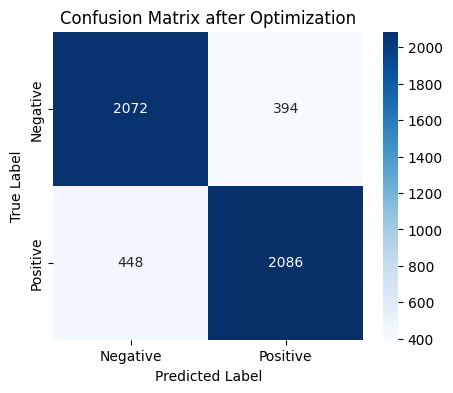

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the evaluation dataset
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Get predictions on the evaluation dataset
pred_output = trainer.predict(eval_dataset)
logits = pred_output.predictions
true_labels = pred_output.label_ids

# Convert logits to predicted labels
pred_labels = np.argmax(logits, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Plot the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix after Optimization")
plt.show()


In [ ]:
import nltk

# Download the correct required NLTK resources explicitly
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Use RandomWordAug instead of SynonymAug to avoid POS tagging issues
import nlpaug.augmenter.word as naw

augmenter = naw.RandomWordAug(action="swap")

# Augment 10% of your dataset
augmented_texts = sample_df['clean_text'].sample(frac=0.1, random_state=42).apply(augmenter.augment)

sample_df_augmented = pd.concat([
    sample_df,
    pd.DataFrame({
        'clean_text': augmented_texts,
        'target': sample_df.loc[augmented_texts.index, 'target']
    })
])


Evaluation Results: {'eval_loss': 0.6440339684486389, 'eval_runtime': 18.3829, 'eval_samples_per_second': 271.992, 'eval_steps_per_second': 17.027, 'epoch': 4.0}

Accuracy: 0.8316
Precision: 0.8411
Recall:    0.8232
F1 Score:  0.8321


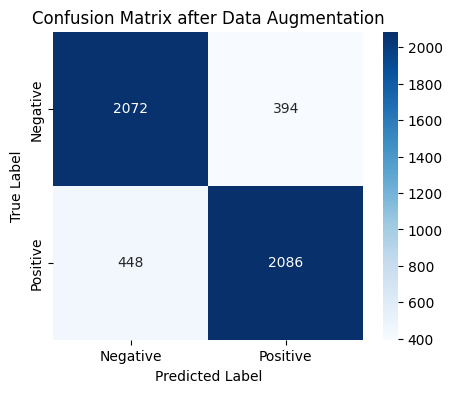

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Predictions
pred_output = trainer.predict(eval_dataset)
logits = pred_output.predictions
true_labels = pred_output.label_ids

pred_labels = np.argmax(logits, axis=1)

# Metrics clearly computed
accuracy = accuracy_score(true_labels, pred_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, pred_labels, average='binary')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion matrix visualization
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix after Data Augmentation")
plt.show()


In [ ]:
# Install augmentation package
!pip install nlpaug

# Install RoBERTa tokenizer/model
!pip install transformers

# NLTK setup
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# ----------------------------
# Imports
# ----------------------------
import torch
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import nlpaug.augmenter.word as naw

# ----------------------------
# Data Preparation
# ----------------------------
# Sample 50,000 entries
sample_df = sentiment140_df.sample(n=50000, random_state=42)

# Convert target to binary
sample_df['target'] = sample_df['target'].apply(lambda x: 0 if x == 0 else 1)

# Data Augmentation - Random Word Swap
augmenter = naw.RandomWordAug(action="swap")
augmented_texts = sample_df['clean_text'].sample(frac=0.1, random_state=42).apply(lambda x: augmenter.augment(str(x)))
sample_df_augmented = pd.concat([
    sample_df,
    pd.DataFrame({
        'clean_text': augmented_texts,
        'target': sample_df.loc[augmented_texts.index, 'target']
    })
])

# Train/test split
train_df, eval_df = train_test_split(sample_df_augmented, test_size=0.1, random_state=42)

# ----------------------------
# Tokenization and Dataset
# ----------------------------
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.labels = df['target'].tolist()
        self.encodings = tokenizer(list(df['clean_text'].astype(str)), truncation=True, padding=True, max_length=128)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_df)
eval_dataset = SentimentDataset(eval_df)

# ----------------------------
# Load RoBERTa Model
# ----------------------------
model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

# ----------------------------
# Training Setup
# ----------------------------
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=300,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# ----------------------------
# Train the Model
# ----------------------------
trainer.train()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nagamedha-sakhamuri98 (nagamedha-sakhamuri98-georgia-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.338300,0.318726
2,0.267400,0.333558


TrainOutput(global_step=6188, training_loss=0.3379573368918302, metrics={'train_runtime': 2457.4994, 'train_samples_per_second': 40.285, 'train_steps_per_second': 2.518, 'total_flos': 6511998620160000.0, 'train_loss': 0.3379573368918302, 'epoch': 2.0})